<a href="https://colab.research.google.com/github/Computational-Tools-in-DS-G42/footballer-profiler-AI/blob/main/Notebook1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


To run this file, please upload it to Google Drive, open it with Google Colab and click on Run all.

## **Data Libraries Import**:

In [ ]:
# Packages and libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from numpy._core.fromnumeric import shape
import numpy as np
import seaborn as sns
from sklearn.metrics import silhouette_samples
from matplotlib import axis

from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import classification_report, accuracy_score, f1_score, balanced_accuracy_score


from sklearn.metrics import davies_bouldin_score
from sklearn.linear_model import LogisticRegression


import random
random.seed(42)


pd.options.display.float_format = '{:.1f}'.format
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [ ]:
#init_df = pd.read_csv("data2.csv", encoding="latin1", sep=",")
url = "https://raw.githubusercontent.com/Computational-Tools-in-DS-G42/datasets/main/data.csv"
init_df = pd.read_csv(url, encoding="latin1", sep=",")
print("Shape" + str(init_df.shape))

Shape(71584, 38)


In [ ]:
url3 = "https://raw.githubusercontent.com/Computational-Tools-in-DS-G42/datasets/main/extra_player_attributes.csv"
extra_att_df = pd.read_csv(url3, encoding="latin1", sep=",")
print("Shape" + str(extra_att_df.shape))

Shape(31771, 5)


## **Exploratory Data Analysis**


In [ ]:
display(init_df.columns)


Index(['name', 'club', 'age', 'position', 'apps', 'mins', 'goals', 'assists',
       'yel', 'red', 'shots', 'ps%', 'aerials_won', 'motm', 'rating',
       'tackles', 'interceptions', 'fouls', 'offsides_won', 'clearances',
       'dribbled', 'blocks', 'own_goals', 'key_passes', 'dribblings', 'fouled',
       'offsides', 'dispossed', 'bad_controls', 'avg_passes', 'crosses',
       'long_passes', 'through_passes', 'league', 'season', 'fee', 'traded',
       'club_position'],
      dtype='object')

In [ ]:
print('Info:')
init_df.info()

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71584 entries, 0 to 71583
Data columns (total 38 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            71584 non-null  object 
 1   club            71584 non-null  object 
 2   age             71584 non-null  int64  
 3   position        71584 non-null  object 
 4   apps            71584 non-null  object 
 5   mins            71584 non-null  int64  
 6   goals           71584 non-null  object 
 7   assists         71584 non-null  object 
 8   yel             71584 non-null  object 
 9   red             71584 non-null  object 
 10  shots           71584 non-null  object 
 11  ps%             71584 non-null  object 
 12  aerials_won     71584 non-null  object 
 13  motm            71584 non-null  object 
 14  rating          71584 non-null  float64
 15  tackles         71528 non-null  object 
 16  interceptions   71528 non-null  object 
 17  fouls           71528 non

In [ ]:
init_df['season'].unique().tolist()

['2009/2010',
 '2010/2011',
 '2011/2012',
 '2012/2013',
 '2013/2014',
 '2014/2015',
 '2015/2016',
 '2016/2017',
 '2017/2018',
 '2018/2019',
 '2019/2020',
 '2020/2021',
 '2021/2022']

In [ ]:
init_df['position'].unique().tolist()

['FW',
 'M(CLR)',
 'D(C)',
 'M(C)',
 'Midfielder',
 'M(CL)',
 'M(R)',
 'M(CR)',
 'DMC',
 'D(CL)',
 'GK',
 'D(L)',
 'D(R)',
 'M(L)',
 'D(CLR)',
 'AM(L)',
 'M(LR)',
 'D(CR)',
 'AM(CLR)',
 'AM(C)',
 'AM(LR)',
 'AM(CL)',
 'AM(CR)',
 'Forward',
 'AM(R)',
 'Defender',
 'Goalkeeper',
 'midfielder',
 'D(LR)',
 'forward']

In [ ]:
display(init_df.head(10))

,name,club,age,position,apps,mins,goals,assists,yel,red,shots,ps%,aerials_won,motm,rating,tackles,interceptions,fouls,offsides_won,clearances,dribbled,blocks,own_goals,key_passes,dribblings,fouled,offsides,dispossed,bad_controls,avg_passes,crosses,long_passes,through_passes,league,season,fee,traded,club_position
0,Arjen Robben,Bayern,26,FW,18(6),1779,16,6,1,-,3.4,80.2,0.4,8,8.2,0.6,0.5,0.9,-,-,0.7,-,-,1.8,4,2.2,0.3,2.1,-,34.3,1.5,2,0.2,Bundesliga,2009/2010,NaN,0,1
1,Arjen Robben,Bayern,26,FW,18(6),1779,16,6,1,-,3.4,80.2,0.4,8,8.2,0.6,0.5,0.9,-,-,0.7,-,-,1.8,4,2.2,0.3,2.1,-,34.3,1.5,2,0.2,Bundesliga,2009/2010,NaN,0,1
2,Stefan Kieling,Leverkusen,26,FW,33,2924,21,5,3,-,3,72.4,2.1,6,7.8,1.2,0.7,2.5,-,0.3,0.5,0.1,-,1.6,1.1,3.1,1.8,2.2,-,32.5,0.2,0.4,0.1,Bundesliga,2009/2010,NaN,0,4
3,Stefan Kieling,Leverkusen,26,FW,33,2924,21,5,3,-,3,72.4,2.1,6,7.8,1.2,0.7,2.5,-,0.3,0.5,0.1,-,1.6,1.1,3.1,1.8,2.2,-,32.5,0.2,0.4,0.1,Bundesliga,2009/2010,NaN,0,4
4,Zvjezdan Misimovic,Wolfsburg,28,FW,31,2768,10,13,7,-,2.4,77.5,0.2,8,7.7,1.9,0.6,1.5,-,0.2,1.2,0.1,-,3.3,1.5,2.1,0.3,3.1,-,51.1,2.5,5.7,0.5,Bundesliga,2009/2010,â¬8.50m,1,8
5,Zvjezdan Misimovic,Wolfsburg,28,FW,31,2768,10,13,7,-,2.4,77.5,0.2,8,7.7,1.9,0.6,1.5,-,0.2,1.2,0.1,-,3.3,1.5,2.1,0.3,3.1,-,51.1,2.5,5.7,0.5,Bundesliga,2009/2010,â¬8.50m,1,8
6,Edin Dzeko,Wolfsburg,24,FW,33(1),3003,22,7,4,-,4.5,70.7,0.7,6,7.7,0.5,0.1,1.9,-,0.9,0.2,0.1,-,1.1,2,1.7,1.6,2.9,-,19.5,0.2,1.1,0.1,Bundesliga,2009/2010,NaN,0,8
7,Edin Dzeko,Wolfsburg,24,FW,33(1),3003,22,7,4,-,4.5,70.7,0.7,6,7.7,0.5,0.1,1.9,-,0.9,0.2,0.1,-,1.1,2,1.7,1.6,2.9,-,19.5,0.2,1.1,0.1,Bundesliga,2009/2010,NaN,0,8
8,Claudio Pizarro,Werder Bremen,32,FW,23(3),2130,16,2,4,-,2.6,75.5,0.4,2,7.6,1,0.7,2,-,0.7,0.4,0.2,-,1.3,1.2,1.2,1.4,3.1,-,24.2,0.1,0.8,-,Bundesliga,2009/2010,NaN,0,3
9,Claudio Pizarro,Werder Bremen,32,FW,23(3),2130,16,2,4,-,2.6,75.5,0.4,2,7.6,1,0.7,2,-,0.7,0.4,0.2,-,1.3,1.2,1.2,1.4,3.1,-,24.2,0.1,0.8,-,Bundesliga,2009/2010,NaN,0,3


In [ ]:
# Note that there might a character instead of Nan
init_df.isna().all()


,0
name,False
club,False
age,False
position,False
apps,False
mins,False
goals,False
assists,False
yel,False
red,False


## **Data Preprocessing**:


### Removing unnacesarry the columns & Filtering out players that played less than 90 mins.

In [ ]:
# Removing unnacesarry the columns

print("Shape: " + str(init_df.shape))
#cols_to_drop = ["club", "motm", "rating", "offsides_won", "league",  "fee", "traded", "club_position"]
# TODO
cols_to_drop = ["club", "motm", "offsides_won", "league",  "fee", "traded", "club_position"]

df_clean = init_df.drop(columns=cols_to_drop)
print("Shape: " + str(df_clean.shape))

Shape: (71584, 38)
Shape: (71584, 31)


In [ ]:
#Filtering out players that played less than 90 mins
print("Before: " + str(df_clean["mins"].min()) + "mins")
df_clean = df_clean[df_clean["mins"] >= 90]
print("After: " + str(df_clean["mins"].min()) + "mins")
print("Shape: " + str(df_clean.shape))


Before: 1mins
After: 90mins
Shape: (63786, 31)


###Removing duplicates

In [ ]:
# Removing duplicates
print("Before: Duplicates: " + str(df_clean.duplicated().sum()) +
      ", Shape: " + str(df_clean.shape))
df_clean = df_clean.drop_duplicates()
print("After: Duplicates: " + str(df_clean.duplicated().sum()) +
      ", Shape: " + str(df_clean.shape))


Before: Duplicates: 32015, Shape: (63786, 31)
After: Duplicates: 0, Shape: (31771, 31)


In [ ]:
# Resets the ordering
df_clean = df_clean.reset_index(drop=True)
df_clean.head(2)

,name,age,position,apps,mins,goals,assists,yel,red,shots,ps%,aerials_won,rating,tackles,interceptions,fouls,clearances,dribbled,blocks,own_goals,key_passes,dribblings,fouled,offsides,dispossed,bad_controls,avg_passes,crosses,long_passes,through_passes,season
0,Arjen Robben,26,FW,18(6),1779,16,6,1,-,3.4,80.2,0.4,8.2,0.6,0.5,0.9,-,0.7,-,-,1.8,4,2.2,0.3,2.1,-,34.3,1.5,2,0.2,2009/2010
1,Stefan Kieling,26,FW,33,2924,21,5,3,-,3,72.4,2.1,7.8,1.2,0.7,2.5,0.3,0.5,0.1,-,1.6,1.1,3.1,1.8,2.2,-,32.5,0.2,0.4,0.1,2009/2010


In [ ]:
dupes = df_clean[df_clean.duplicated(subset=["name", "season"], keep=False)]
dupes_sorted = dupes.sort_values(by=["name", "season"])

print(f"Remaining duplicates (same name & same season): {len(dupes_sorted)}")
dupes_sorted.head(5)


Remaining duplicates (same name & same season): 2488


,name,age,position,apps,mins,goals,assists,yel,red,shots,ps%,aerials_won,rating,tackles,interceptions,fouls,clearances,dribbled,blocks,own_goals,key_passes,dribblings,fouled,offsides,dispossed,bad_controls,avg_passes,crosses,long_passes,through_passes,season
21326,Aaron Lennon,28,M(LR),12(2),1072,2,-,2,-,0.5,78,0.2,6.8,1.9,0.7,0.8,0.7,1.1,-,-,1.1,0.6,1.4,0.1,1.1,1,23.4,0.3,0.7,0.1,2014/2015
21507,Aaron Lennon,28,M(LR),3(6),276,-,2,1,-,0.2,85.2,-,6.4,1.1,0.3,0.4,0.2,0.2,-,-,1,0.2,0.3,-,0.7,0.2,12,0.3,0.1,0.1,2014/2015
22879,Aaron Lennon,31,M(LR),13(1),1125,-,2,2,-,0.7,70.8,0.5,6.6,1.4,0.6,0.7,0.6,1.3,0.4,-,0.5,0.7,0.9,0.1,1.6,0.6,19.6,0.4,0.4,-,2017/2018
22973,Aaron Lennon,31,M(LR),9(6),795,-,-,-,-,0.3,69.1,0.3,6.4,1.1,0.7,0.7,0.5,1.1,0.1,-,0.3,0.3,0.5,-,0.7,0.7,12.9,0.1,0.2,-,2017/2018
5108,Aaron Martin,24,M(L),3(2),261,-,-,-,-,0.2,73.5,0.2,6.2,0.6,0.4,0.8,0.4,0.4,-,-,0.6,0.6,-,-,0.4,0.6,22.6,0.8,1.4,-,2020/2021


###Adding height and foot attributes

This is conducted as an experiment to see whether adding features "preferred foot" and "height" makes much of different.


In [ ]:
display(extra_att_df.head(10))

,name,matched_name,match_score,height,preferred_foot
0,Arjen Robben,arjen robben,100.0,180.0,left
1,Stefan Kieling,stefan kiealing,96.6,191.0,right
2,Zvjezdan Misimovic,zvjezdan misimovic,100.0,179.0,both
3,Edin Dzeko,NaN,0.0,NaN,NaN
4,Claudio Pizarro,claudio pizarro,100.0,184.0,right
5,Paolo Guerrero,NaN,0.0,NaN,NaN
6,Mesut Ozil,mesut azil,90.0,180.0,left
7,Naldo,naldo,100.0,198.0,right
8,Toni Kroos,toni kroos,100.0,183.0,right
9,Raffael,raffael,100.0,174.0,right


In [ ]:
print(df_clean.shape)
print(extra_att_df.shape)

(31771, 31)
(31771, 5)


In [ ]:
(df_clean['name'] == extra_att_df['name']).all()


np.True_

In [ ]:
df_clean['height'] = extra_att_df['height'].values
df_clean['foot'] = extra_att_df['preferred_foot'].values


In [ ]:
display(df_clean.head(5))

,name,age,position,apps,mins,goals,assists,yel,red,shots,ps%,aerials_won,rating,tackles,interceptions,fouls,clearances,dribbled,blocks,own_goals,key_passes,dribblings,fouled,offsides,dispossed,bad_controls,avg_passes,crosses,long_passes,through_passes,season,height,foot
0,Arjen Robben,26,FW,18(6),1779,16,6,1,-,3.4,80.2,0.4,8.2,0.6,0.5,0.9,-,0.7,-,-,1.8,4,2.2,0.3,2.1,-,34.3,1.5,2,0.2,2009/2010,180.0,left
1,Stefan Kieling,26,FW,33,2924,21,5,3,-,3,72.4,2.1,7.8,1.2,0.7,2.5,0.3,0.5,0.1,-,1.6,1.1,3.1,1.8,2.2,-,32.5,0.2,0.4,0.1,2009/2010,191.0,right
2,Zvjezdan Misimovic,28,FW,31,2768,10,13,7,-,2.4,77.5,0.2,7.7,1.9,0.6,1.5,0.2,1.2,0.1,-,3.3,1.5,2.1,0.3,3.1,-,51.1,2.5,5.7,0.5,2009/2010,179.0,both
3,Edin Dzeko,24,FW,33(1),3003,22,7,4,-,4.5,70.7,0.7,7.7,0.5,0.1,1.9,0.9,0.2,0.1,-,1.1,2,1.7,1.6,2.9,-,19.5,0.2,1.1,0.1,2009/2010,NaN,NaN
4,Claudio Pizarro,32,FW,23(3),2130,16,2,4,-,2.6,75.5,0.4,7.6,1,0.7,2,0.7,0.4,0.2,-,1.3,1.2,1.2,1.4,3.1,-,24.2,0.1,0.8,-,2009/2010,184.0,right


Missing items: 1922


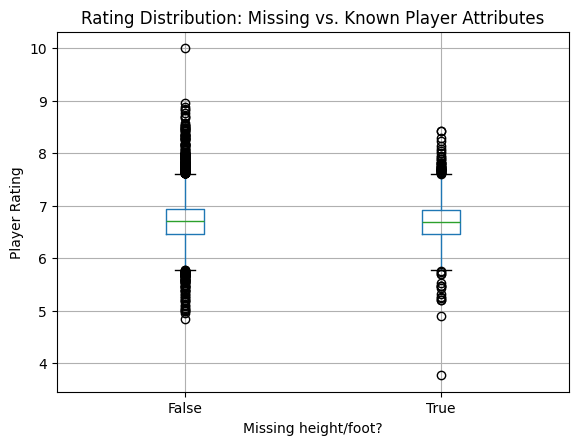

In [ ]:

# (Not much relevant) Analysis of the players that do not have either "foot" or "height"
missing_players = df_clean[df_clean['height'].isna() | df_clean['foot'].isna()]

missing_players = missing_players.drop_duplicates(subset=['name'])

print("Missing items: " + str(missing_players.shape[0]))

#df_clean['missing_info'] = df_clean['name'].isin(missing_players['name'])
df_copy = df_clean.copy()
df_copy['missing_info'] = df_copy['name'].isin(missing_players['name'])


df_copy.boxplot(column='rating', by='missing_info')
plt.title("Rating Distribution: Missing vs. Known Player Attributes")
plt.suptitle("")
plt.xlabel("Missing height/foot?")
plt.ylabel("Player Rating")
plt.show()


In [ ]:
display(df_clean.head(1))

,name,age,position,apps,mins,goals,assists,yel,red,shots,ps%,aerials_won,rating,tackles,interceptions,fouls,clearances,dribbled,blocks,own_goals,key_passes,dribblings,fouled,offsides,dispossed,bad_controls,avg_passes,crosses,long_passes,through_passes,season,height,foot
0,Arjen Robben,26,FW,18(6),1779,16,6,1,-,3.4,80.2,0.4,8.2,0.6,0.5,0.9,-,0.7,-,-,1.8,4,2.2,0.3,2.1,-,34.3,1.5,2,0.2,2009/2010,180.0,left


In [ ]:
# Removing players that do not have either "height" or "foot" attribute

before = df_clean.shape[0]
df_clean = df_clean.dropna(subset=['height', 'foot'])
df_clean = df_clean.reset_index(drop=True)

print(f"Removed {before - df_clean.shape[0]} players")

#df_clean[["name", "height", "foot"]].head(5)

Removed 5715 players


In [ ]:
df_clean[["name", "height", "foot"]].head(10)


,name,height,foot
0,Arjen Robben,180.0,left
1,Stefan Kieling,191.0,right
2,Zvjezdan Misimovic,179.0,both
3,Claudio Pizarro,184.0,right
4,Mesut Ozil,180.0,left
5,Naldo,198.0,right
6,Toni Kroos,183.0,right
7,Raffael,174.0,right
8,Nuri Sahin,180.0,left
9,Lucas Barrios,189.0,right


### Filtering out (again)

In [ ]:
#Filtering out players that played less than 90 mins
print("Before: " + str(df_clean["mins"].min()) + "mins")
val1 = df_clean.shape[0]
df_clean = df_clean[df_clean["mins"] >= 400]
print("After: " + str(df_clean["mins"].min()) + "mins")
print(f"Removed players: {val1 - df_clean.shape[0]}")

Before: 90mins
After: 400mins
Removed players: 4365


In [ ]:
print("Before min rating: " + str(df_clean["rating"].min()))
val1 = df_clean.shape[0]
df_clean = df_clean[df_clean["rating"] >= 7]
print("After min rating: " + str(df_clean["rating"].min()))
print(f"Removed players: {val1 - df_clean.shape[0]}, Total player: {df_clean.shape[0]}")

Before min rating: 5.8
After min rating: 7.0
Removed players: 16922, Total player: 4769


### Removing substitute data & Cleaning up duplicate positions.



In [ ]:
# Removing substitute data

df_clean[['starts', 'subs']] = (
    df_clean['apps']
    .str.extract(r'(\d+)\(?(\d+)?\)?')
    .astype(float)
)

df_clean[['starts', 'subs']] = (
    df_clean['apps']
    .str.extract(r'(\d+)\(?(\d+)?\)?')
    .astype(float)
)

df_clean['apps'] = df_clean['starts'].fillna(0) + df_clean['subs'].fillna(0)

df_clean = df_clean.drop(columns=['starts', 'subs'])

#df_clean[df_clean["starts"] < 5.0][["apps", "starts", "subs"]].head(100)

#df_clean['apps'] = df_clean['apps'].str.replace(r'\(.*\)', '', regex=True).str.strip()

# Renaming column
df_clean = df_clean.rename(columns={'dispossed': 'poss_losses'})

display(df_clean.head(5))


,name,age,position,apps,mins,goals,assists,yel,red,shots,ps%,aerials_won,rating,tackles,interceptions,fouls,clearances,dribbled,blocks,own_goals,key_passes,dribblings,fouled,offsides,poss_losses,bad_controls,avg_passes,crosses,long_passes,through_passes,season,height,foot
0,Arjen Robben,26,FW,24.0,1779,16,6,1,-,3.4,80.2,0.4,8.2,0.6,0.5,0.9,-,0.7,-,-,1.8,4,2.2,0.3,2.1,-,34.3,1.5,2,0.2,2009/2010,180.0,left
1,Stefan Kieling,26,FW,33.0,2924,21,5,3,-,3,72.4,2.1,7.8,1.2,0.7,2.5,0.3,0.5,0.1,-,1.6,1.1,3.1,1.8,2.2,-,32.5,0.2,0.4,0.1,2009/2010,191.0,right
2,Zvjezdan Misimovic,28,FW,31.0,2768,10,13,7,-,2.4,77.5,0.2,7.7,1.9,0.6,1.5,0.2,1.2,0.1,-,3.3,1.5,2.1,0.3,3.1,-,51.1,2.5,5.7,0.5,2009/2010,179.0,both
3,Claudio Pizarro,32,FW,26.0,2130,16,2,4,-,2.6,75.5,0.4,7.6,1,0.7,2,0.7,0.4,0.2,-,1.3,1.2,1.2,1.4,3.1,-,24.2,0.1,0.8,-,2009/2010,184.0,right
4,Mesut Ozil,22,M(CLR),31.0,2601,9,13,2,-,2.2,82.5,0.1,7.6,0.7,0.8,0.7,-,0.7,-,-,3,2.3,1.4,0.5,2.9,-,34.9,2.1,1.4,0.1,2009/2010,180.0,left


In [ ]:
# Cleaning up duplicate positions

df_clean['position'] = df_clean['position'].replace({
    'Goalkeeper': 'GK',
    'Forward': 'FW',
    'forward': 'FW',
    'Midfielder': 'M',
    'midfielder': 'M',
    'Defender': 'D',

    'AM(C)': "AM",
    'AM(CL)': "AM",
    'AM(CLR)': "AM",
    'AM(CR)': "AM",
    'AM(L)': "AM",
    'AM(LR)': "AM",
    'AM(R)': "AM",

    'D(C)': "D",
    'D(CL)': "D",
    'D(CLR)': "D",
    'D(CR)': "D",
    'D(L)': "D",
    'D(LR)': "D",
    'D(R)': "D",

    'M(C)': "M",
    'M(CL)': "M",
    'M(CLR)': "M",
    'M(CR)': "M",
    'M(L)': "M",
    'M(LR)': "M",
    'M(R)': "M",

    "DMC": "DM",

})

#df_clean['position'].unique().tolist()
list(sorted(df_clean['position'].unique()))


['AM', 'D', 'DM', 'FW', 'GK', 'M']

### Encoding features

In [ ]:
df_clean["foot"].unique().tolist()

['left', 'right', 'both']

In [ ]:
df_clean = pd.get_dummies(df_clean, columns=['foot'], prefix='foot', dtype=int)

In [ ]:
display(df_clean.head(5))

,name,age,position,apps,mins,goals,assists,yel,red,shots,ps%,aerials_won,rating,tackles,interceptions,fouls,clearances,dribbled,blocks,own_goals,key_passes,dribblings,fouled,offsides,poss_losses,bad_controls,avg_passes,crosses,long_passes,through_passes,season,height,foot_both,foot_left,foot_right
0,Arjen Robben,26,FW,24.0,1779,16,6,1,-,3.4,80.2,0.4,8.2,0.6,0.5,0.9,-,0.7,-,-,1.8,4,2.2,0.3,2.1,-,34.3,1.5,2,0.2,2009/2010,180.0,0,1,0
1,Stefan Kieling,26,FW,33.0,2924,21,5,3,-,3,72.4,2.1,7.8,1.2,0.7,2.5,0.3,0.5,0.1,-,1.6,1.1,3.1,1.8,2.2,-,32.5,0.2,0.4,0.1,2009/2010,191.0,0,0,1
2,Zvjezdan Misimovic,28,FW,31.0,2768,10,13,7,-,2.4,77.5,0.2,7.7,1.9,0.6,1.5,0.2,1.2,0.1,-,3.3,1.5,2.1,0.3,3.1,-,51.1,2.5,5.7,0.5,2009/2010,179.0,1,0,0
3,Claudio Pizarro,32,FW,26.0,2130,16,2,4,-,2.6,75.5,0.4,7.6,1,0.7,2,0.7,0.4,0.2,-,1.3,1.2,1.2,1.4,3.1,-,24.2,0.1,0.8,-,2009/2010,184.0,0,0,1
4,Mesut Ozil,22,M,31.0,2601,9,13,2,-,2.2,82.5,0.1,7.6,0.7,0.8,0.7,-,0.7,-,-,3,2.3,1.4,0.5,2.9,-,34.9,2.1,1.4,0.1,2009/2010,180.0,0,1,0


### Converting columns into float



In [ ]:
# Converting columns into float

cols = ['age','apps', 'mins', 'goals', 'assists', 'yel',
       'red', 'shots', 'ps%', 'aerials_won', 'tackles', 'interceptions',
       'fouls', 'clearances', 'dribbled', 'blocks', 'own_goals', 'key_passes',
       'dribblings', 'fouled', 'offsides', 'poss_losses', 'bad_controls',
       'avg_passes', 'crosses', 'long_passes', 'through_passes', "foot_both",
        "foot_left", "foot_right"]

for curr in cols:
  df_clean[curr] = pd.to_numeric(df_clean[curr], errors='coerce').fillna(0)

df_clean[cols] = df_clean[cols].astype(float)

### Converting attributes per game to per 90 minnutes

In [ ]:
# Converting attributes "goals" and "assists" to per 90 minutes.

df_clean['goals_p90'] = df_clean['goals'] / (df_clean['mins'] / 90)
df_clean['assists_p90'] = df_clean['assists'] / (df_clean['mins'] / 90)

df_clean = df_clean.drop(columns=["goals", "assists"])

In [ ]:
# Converting per-game attributes to per 90 minnutes.

cols = ["yel", "red", "shots", "aerials_won", "tackles",  "interceptions",
        "fouls", "clearances", "dribbled", "blocks", "own_goals", "key_passes",
        "dribblings", "fouled",  "offsides", "poss_losses", "bad_controls",
        "avg_passes", "crosses", "long_passes", "through_passes"]


for curr in cols:
    total_mins = df_clean["mins"]
    total_val = df_clean[curr] * df_clean["apps"]
    df_clean[curr + "_p90"] = total_val / ( total_mins / 90)


df_clean = df_clean.drop(columns=cols)


In [ ]:
list(df_clean.columns)

['name',
 'age',
 'position',
 'apps',
 'mins',
 'ps%',
 'rating',
 'season',
 'height',
 'foot_both',
 'foot_left',
 'foot_right',
 'goals_p90',
 'assists_p90',
 'yel_p90',
 'red_p90',
 'shots_p90',
 'aerials_won_p90',
 'tackles_p90',
 'interceptions_p90',
 'fouls_p90',
 'clearances_p90',
 'dribbled_p90',
 'blocks_p90',
 'own_goals_p90',
 'key_passes_p90',
 'dribblings_p90',
 'fouled_p90',
 'offsides_p90',
 'poss_losses_p90',
 'bad_controls_p90',
 'avg_passes_p90',
 'crosses_p90',
 'long_passes_p90',
 'through_passes_p90']

### Finding highly correlated features and deleting them

In [ ]:
numeric_df = df_clean.select_dtypes(include='number')
cols = list(numeric_df.columns)

for i, col in enumerate(cols, start=1):
    print(f"{i}. {col}")


1. age
2. apps
3. mins
4. ps%
5. rating
6. height
7. foot_both
8. foot_left
9. foot_right
10. goals_p90
11. assists_p90
12. yel_p90
13. red_p90
14. shots_p90
15. aerials_won_p90
16. tackles_p90
17. interceptions_p90
18. fouls_p90
19. clearances_p90
20. dribbled_p90
21. blocks_p90
22. own_goals_p90
23. key_passes_p90
24. dribblings_p90
25. fouled_p90
26. offsides_p90
27. poss_losses_p90
28. bad_controls_p90
29. avg_passes_p90
30. crosses_p90
31. long_passes_p90
32. through_passes_p90


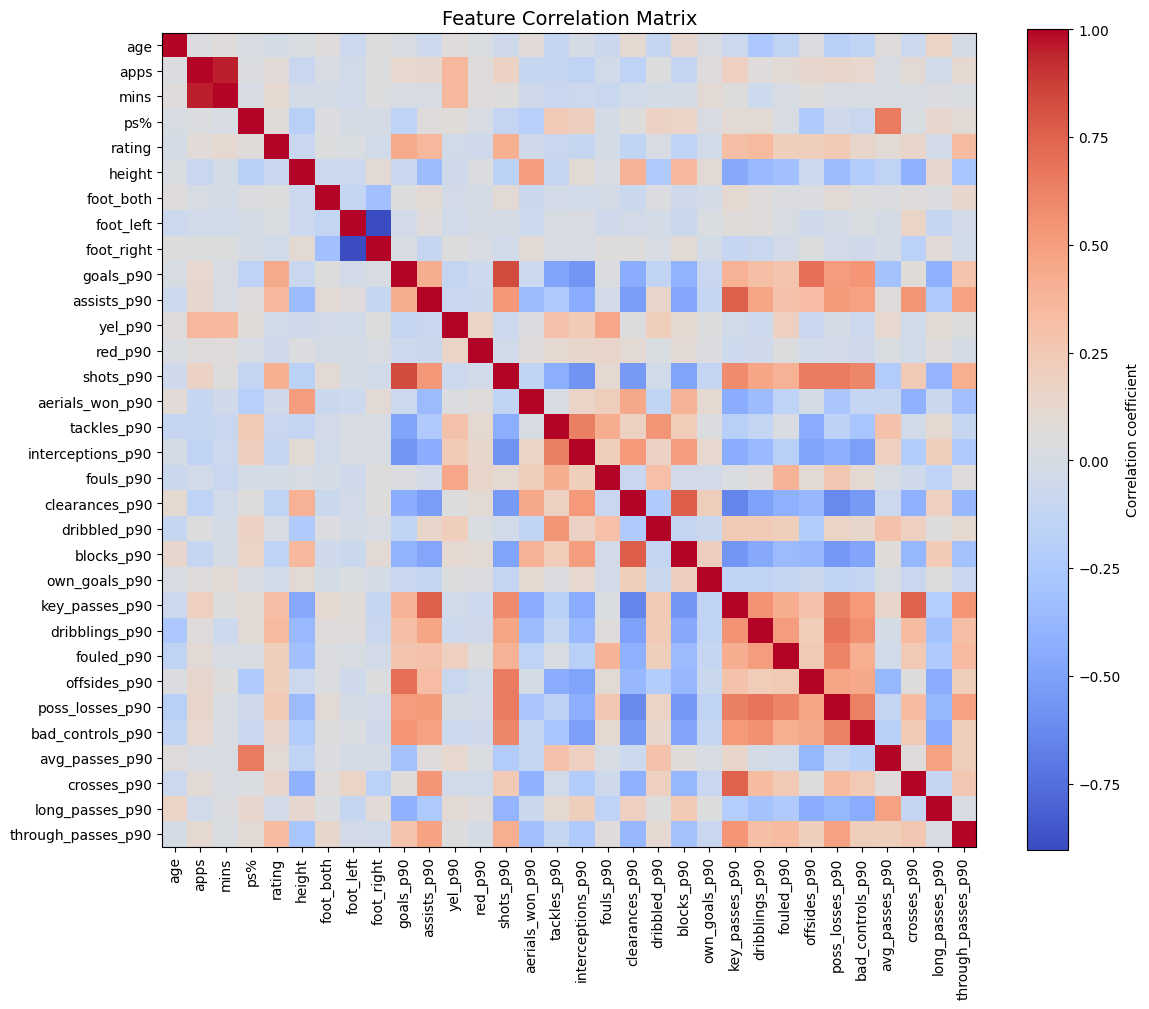

In [ ]:

def correlation_matrix():
  numeric_df = df_clean.select_dtypes(include='number')
  corr = numeric_df.corr()

  plt.figure(figsize=(12, 10))
  plt.imshow(corr, cmap='coolwarm', interpolation='nearest')
  plt.colorbar(label='Correlation coefficient')
  plt.title("Feature Correlation Matrix", fontsize=14)
  plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
  plt.yticks(range(len(corr.columns)), corr.columns)
  plt.tight_layout()
  plt.show()

correlation_matrix()


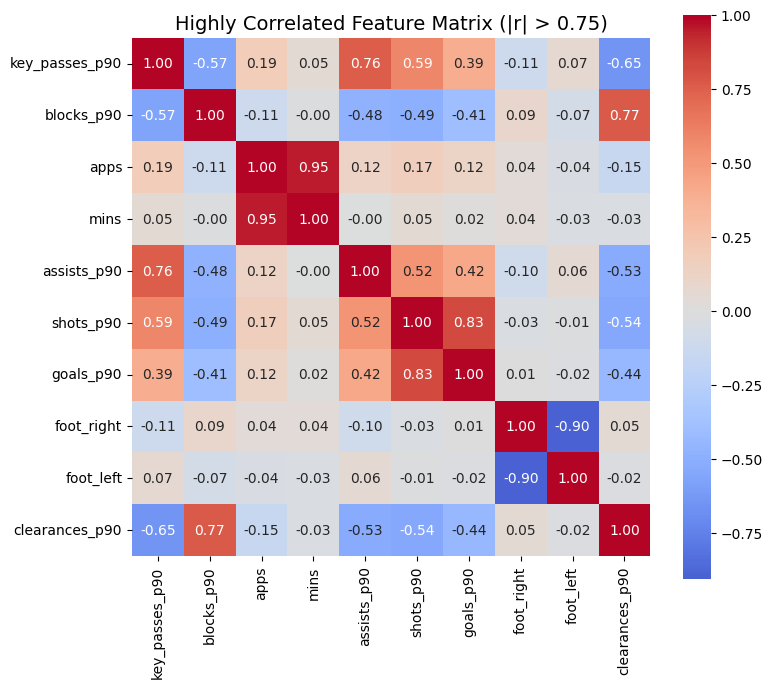

In [ ]:

def correlation_matrix2():
  numeric_df = df_clean.select_dtypes(include='number')
  corr = numeric_df.corr()
  threshold = 0.75
  high_corr_pairs = corr.unstack().sort_values(ascending=False)
  high_corr_pairs = high_corr_pairs[(abs(high_corr_pairs) > threshold) & (abs(high_corr_pairs) < 1)]

  # Extract relevant features
  high_corr_features = list(
      set(high_corr_pairs.index.get_level_values(0)).union(
          set(high_corr_pairs.index.get_level_values(1))
      )
  )

  #print("Highly correlated features:", high_corr_features)

  # Subset correlation matrix
  corr_subset = corr.loc[high_corr_features, high_corr_features]

  # Plot with Seaborn
  plt.figure(figsize=(8, 7))
  sns.heatmap(corr_subset, cmap='coolwarm', annot=True, fmt=".2f", center=0, square=True)
  plt.title(f"Highly Correlated Feature Matrix (|r| > {threshold})", fontsize=14)
  plt.tight_layout()
  plt.show()

correlation_matrix2()

In [ ]:
# Deleting highly correlated features

df_clean = df_clean.drop(columns=["apps"])

### Splitting data

In [ ]:
# Split data

df_train, df_unseen = train_test_split(df_clean, test_size=0.05, random_state=42)

print("Total: " + str(df_clean.shape[0]))
print("Train: " + str(df_train.shape[0]))
print("Unseen: " + str(df_unseen.shape[0]))

Total: 4769
Train: 4530
Unseen: 239


### Removing some of the features yet again



In [ ]:


exclude_cols = ["name","position", "season", "rating", "mins", "height", "age", "ps%", "yel_p90", "red_p90", "offsides_p90",
                "foot_both", "foot_left", "foot_right", "aerials_won_p90", "fouls_p90", "dribbled_p90",
                 "avg_passes_p90", "own_goals_p90", "through_passes_p90", "long_passes_p90", "dribblings_p90", "fouled_p90"]



X = df_train.drop(columns=exclude_cols)
feature_names = X.columns



In [ ]:
list(X.columns)

['goals_p90',
 'assists_p90',
 'shots_p90',
 'tackles_p90',
 'interceptions_p90',
 'clearances_p90',
 'blocks_p90',
 'key_passes_p90',
 'poss_losses_p90',
 'bad_controls_p90',
 'crosses_p90']

In [ ]:
X[X.lt(0).any(axis=1)].head(10)
X[X.select_dtypes(include='number').lt(0).any(axis=1)].head(10)


,goals_p90,assists_p90,shots_p90,tackles_p90,interceptions_p90,clearances_p90,blocks_p90,key_passes_p90,poss_losses_p90,bad_controls_p90,crosses_p90


### Standardizing data

In [ ]:
X.head(10)

,goals_p90,assists_p90,shots_p90,tackles_p90,interceptions_p90,clearances_p90,blocks_p90,key_passes_p90,poss_losses_p90,bad_controls_p90,crosses_p90
5345,0.4,0.3,1.5,1.1,1.3,0.3,0.0,2.6,1.0,0.9,1.0
20882,0.0,0.0,0.7,2.5,2.1,3.5,0.2,0.8,0.9,1.0,0.3
265,0.1,0.2,0.8,4.6,2.5,1.9,0.1,0.5,1.2,1.7,0.0
5413,0.0,0.0,0.2,2.5,5.1,3.9,0.5,0.2,0.5,0.3,0.0
1203,0.2,0.1,3.0,2.0,0.7,0.4,0.0,2.4,2.6,1.0,1.5
21732,0.9,0.2,3.8,0.9,0.4,0.1,0.1,1.5,2.8,1.5,0.2
17852,0.5,0.2,2.7,0.2,0.1,0.6,0.1,1.1,1.5,2.3,0.3
5037,0.0,0.0,0.2,2.6,3.5,4.0,0.6,0.3,0.3,0.4,0.0
16513,0.1,0.6,1.4,2.8,0.7,1.0,0.1,3.0,1.5,1.1,1.8
15737,0.3,0.2,2.4,1.1,0.4,1.1,0.0,1.3,2.4,2.4,0.3


In [ ]:
scaler = StandardScaler()
X_scaled_all = scaler.fit_transform(X)

In [ ]:
#display(df_train_scaled.head(100))
print(X_scaled_all[:5])  # first 5 rows

# Every feature should have a mean of ≈0
print("\nTrain means:", X_scaled_all.mean(axis=0))

# Every feature should have a standard deviation of 1
print("\nTrain stds :", X_scaled_all.std(axis=0))


[[ 0.93000434  1.15270712  0.0193997  -0.83619312 -0.39841538 -0.86804707
  -0.99071964  1.61386266 -0.14845026 -0.21794517  0.67109383]
 [-0.6677949  -0.6982229  -0.66680873  0.44392898  0.35524632  0.37875742
  -0.3079675  -0.42523288 -0.2851047  -0.09898253 -0.40019843]
 [-0.30984843  0.39937115 -0.56156872  2.38792108  0.70558519 -0.25063569
  -0.63757198 -0.75410274  0.09956143  0.63366329 -0.84578017]
 [-0.85413874 -1.0228263  -1.07612314  0.48862199  3.09596462  0.52158653
   0.74836601 -1.11868971 -0.72519444 -0.87542702 -0.84578017]
 [ 0.09366977  0.07786968  1.20316276 -0.01717386 -0.88795201 -0.80328268
  -0.99071964  1.47896228  1.68582204 -0.15076956  1.35764601]]

Train means: [-3.76446483e-17 -7.68578235e-17  1.11365418e-16 -2.36455447e-16
 -8.47004586e-17  3.37233307e-17  1.80380606e-17 -8.15634045e-17
  7.97988117e-17 -3.13705402e-18 -1.56852701e-18]

Train stds : [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


## **Unsupervised Training**:


### DBSCAN algorithm


In [ ]:
# We also tried DBSCAN, but as the number of clusters is determined automatically and the clusters it forms do not make much sense, we excluded it.

# for eps in [0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]:
#     db = DBSCAN(eps=eps, min_samples=5).fit(X_scaled_all)
#     labels, counts = np.unique(db.labels_, return_counts=True)
#     print(f"eps={eps}: {dict(zip(labels, counts))}")


In [ ]:
# db = DBSCAN(eps=2.8, min_samples=5).fit(X_scaled)
# print(np.unique(db.labels_, return_counts=True))

In [ ]:
# score = silhouette_score(X_scaled, db.labels_)
# print(f"DBSCAN Silhouette: {score:.4f}")


### Elbow method for finding appropriate K value

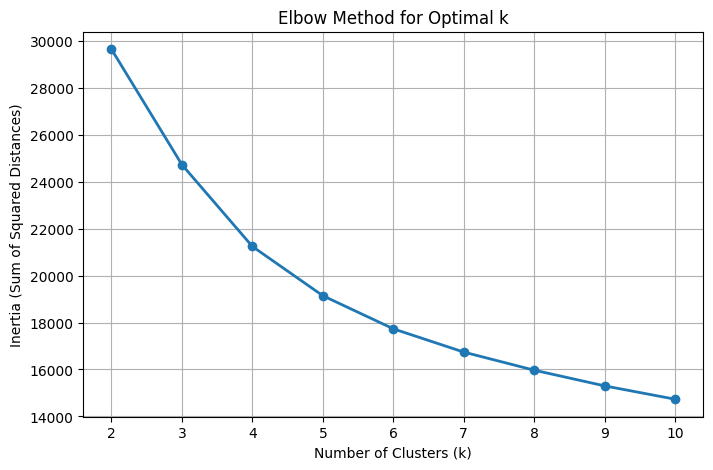

In [ ]:
def elbow_method(i, j):
  inertias = []
  K = range(i, j)  # test cluster numbers from 2 to 15

  for k in K:
      kmeans = KMeans(n_clusters=k, random_state=42)
      kmeans.fit(X_scaled_all)
      inertias.append(kmeans.inertia_)

  # Plot the results
  plt.figure(figsize=(8, 5))
  plt.plot(K, inertias, 'o-', linewidth=2, markersize=6)
  plt.title('Elbow Method for Optimal k')
  plt.xlabel('Number of Clusters (k)')
  plt.ylabel('Inertia (Sum of Squared Distances)')
  plt.grid(True)
  plt.show()

elbow_method(2, 11)

### K-means algorithm

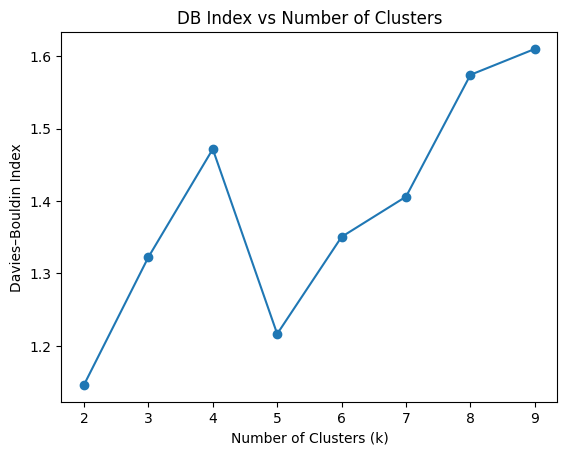

In [ ]:
# Davies-Bouldin index for different K values

def DBI():
  scores = []
  for k in range(2, 10):
      kmeans = KMeans(n_clusters=k, random_state=42)
      labels = kmeans.fit_predict(X_scaled_all)
      score = davies_bouldin_score(X_scaled_all, labels)
      scores.append(score)

  plt.plot(range(2, 10), scores, marker='o')
  plt.xlabel('Number of Clusters (k)')
  plt.ylabel('Davies–Bouldin Index')
  plt.title('DB Index vs Number of Clusters')
  plt.show()

DBI()

In [ ]:
# Silhouette Scores for different K values
def silhouette_score_for_dif_k(i, j):
  scores = {}
  for k in range(i, j):
      kmeans = KMeans(n_clusters=k, random_state=42)
      labels = kmeans.fit_predict(X_scaled_all)
      score = silhouette_score(X_scaled_all, labels)
      scores[k] = score
      print(f"k={k}, silhouette={score:.4f}")

silhouette_score_for_dif_k(2, 11)

k=2, silhouette=0.3551
k=3, silhouette=0.2559
k=4, silhouette=0.2442
k=5, silhouette=0.2721
k=6, silhouette=0.2364
k=7, silhouette=0.2301
k=8, silhouette=0.1984
k=9, silhouette=0.1714
k=10, silhouette=0.1661


In [ ]:
# Tain model
kmeans = KMeans(n_clusters=5, random_state=42)
y_all = kmeans.fit_predict(X_scaled_all)
kmean_labels = kmeans.labels_
df_train['cluster'] = kmeans.labels_

In [ ]:
# Compute Davies-Bouldin index (again)
db_index = davies_bouldin_score(X_scaled_all, kmeans.labels_)
print("Davies-Bouldin Index:", db_index)

Davies-Bouldin Index: 1.2164693421404957


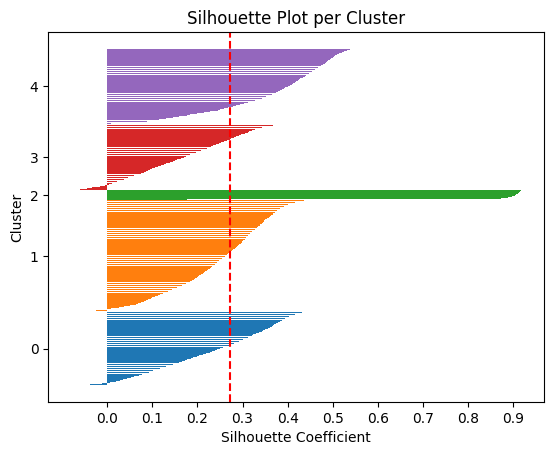

In [ ]:
# Silhouette score plot per cluster for the selected K value

def silhoutte_score_per_cluster():
  silhouette_vals = silhouette_samples(X_scaled_all, df_train["cluster"])
  y_ax_lower, y_ax_upper = 0, 0
  yticks = []

  for i in np.unique(df_train["cluster"]):
      cluster_silhouette_vals = silhouette_vals[df_train["cluster"] == i]
      cluster_silhouette_vals.sort()
      y_ax_upper += len(cluster_silhouette_vals)
      plt.barh(range(y_ax_lower, y_ax_upper),
              cluster_silhouette_vals, edgecolor='none')
      yticks.append((y_ax_lower + y_ax_upper) / 2)
      y_ax_lower += len(cluster_silhouette_vals)

  plt.axvline(x=silhouette_score(X_scaled_all, df_train["cluster"]), color="red", linestyle="--")
  plt.yticks(yticks, np.unique(df_train["cluster"]))
  plt.ylabel("Cluster")
  plt.xlabel("Silhouette Coefficient")
  plt.title("Silhouette Plot per Cluster")
  plt.xticks(np.arange(0.0, 1.0, 0.1))
  plt.show()

silhoutte_score_per_cluster()

### Analysis of the result

In [ ]:
df_clusters = df_train.groupby("cluster")["position"].value_counts(normalize=True).unstack().fillna(0)
cluster_counts = df_train["cluster"].value_counts().sort_index()

In [ ]:
# Player distribution by cluster

cluster_counts

,count
cluster,
0,979
1,1518
2,131
3,890
4,1012


In [ ]:
# Printing out the percentage of each position in each cluster

def print_group_percentages():
  clusters_per_line = 5

  blocks = []
  for cluster_id, row in df_clusters.iterrows():
      total_items = cluster_counts[cluster_id]
      top3 = row.nlargest(3) * 100
      lines = [f"Cluster {cluster_id}"] + [f"Total: {total_items} "] + [f"  {pos}: {pct:.0f}%" for pos, pct in top3.items()]
      block = "\n".join(lines)
      blocks.append(block)

  # Padding width for alignment
  max_width = max(len(block.split("\n")[0]) for block in blocks) + 7

  # Print horizontally formatted clusters
  for i in range(0, len(blocks), clusters_per_line):
      row_blocks = blocks[i:i + clusters_per_line]

      # Split into lines per block and pad each line for alignment
      split_blocks = [b.split("\n") for b in row_blocks]
      max_lines = max(len(b) for b in split_blocks)
      for line_idx in range(max_lines):
          line_parts = []
          for block in split_blocks:
              if line_idx < len(block):
                  line_parts.append(block[line_idx].ljust(max_width))
              else:
                  line_parts.append("".ljust(max_width))
          print("".join(line_parts))
      print()

print_group_percentages()

Cluster 0       Cluster 1       Cluster 2       Cluster 3       Cluster 4       
Total: 979      Total: 1518     Total: 131      Total: 890      Total: 1012     
  FW: 90%         M: 70%          GK: 92%         M: 52%          D: 88%        
  M: 7%           DM: 14%         D: 7%           FW: 35%         DM: 7%        
  AM: 3%          D: 13%          DM: 1%          AM: 9%          M: 5%         



In [ ]:
# Defining cluster names dynamically as with different execution, the order of the cluster might not be the same

def set_cluster_name(row, threshold=0.7):
    top2 = row.nlargest(2)
    main_role = top2.index[0]
    main_val = top2.iloc[0]
    second_role = top2.index[1]
    second_val = top2.iloc[1]

    # If top role dominates clearly
    if main_val >= threshold:
        return main_role

    # elif main_role == "M" and 0.60 <= main_val <= 0.65:
    #   return "DM"

    elif main_role == "M" and 0.45 <= main_val <= 0.55:
      return "AM"

    else:
        assert(False)

cluster_names = {
    idx: set_cluster_name(row)
    for idx, row in df_clusters.iterrows()
}

df_train["cluster_name"] = df_train["cluster"].map(cluster_names)

### Some Visual Graphs

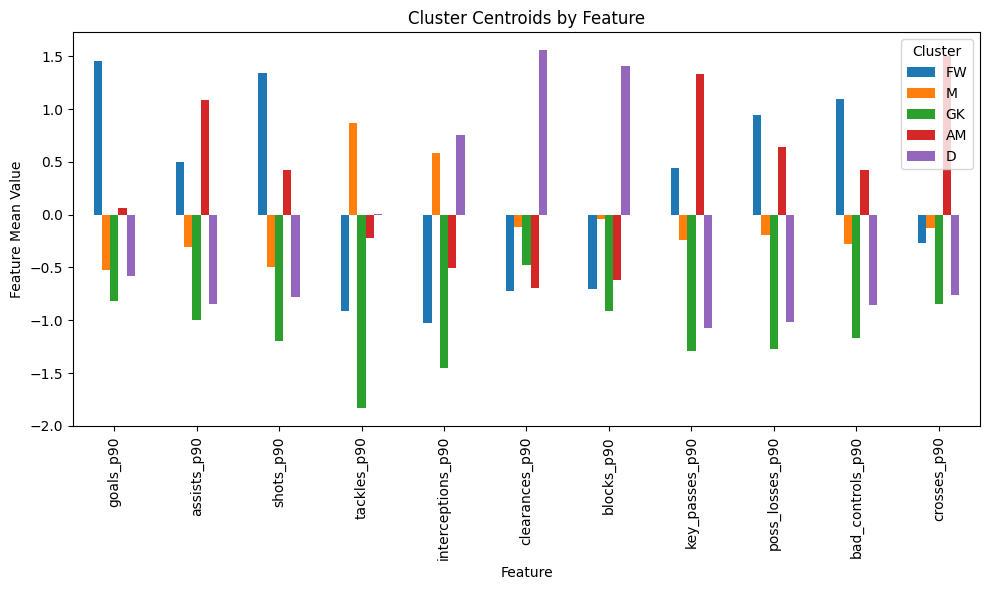

In [ ]:
def display_cluster_centroids():
  centers = pd.DataFrame(kmeans.cluster_centers_, columns=feature_names)
  centers.index = [cluster_names[i] for i in centers.index]

  # centers = scaler.inverse_transform(kmeans.cluster_centers_)
  # centers = pd.DataFrame(centers, columns=feature_names)

  centers.T.plot(kind='bar', figsize=(10,6))
  plt.title('Cluster Centroids by Feature')
  plt.ylabel('Feature Mean Value')
  plt.xlabel('Feature')
  plt.legend(title='Cluster')
  plt.tight_layout()
  plt.show()

display_cluster_centroids()

In [ ]:
#labels_named = [cluster_names[i] for i in cluster_names]

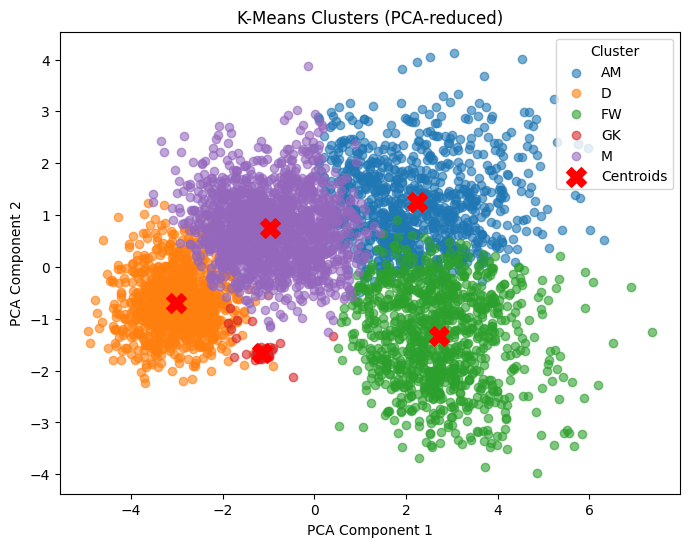

In [ ]:
def display_pca_plot():

    labels_named = [cluster_names[i] for i in kmean_labels]

    # Reduces to 2D for visualization
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled_all)

    # Assigns numeric colors to each name
    cluster_names_unique = sorted(set(labels_named))
    color_map = {name: i for i, name in enumerate(cluster_names_unique)}

    plt.figure(figsize=(8,6))

    # Plots each cluster separately (so legend shows names)
    for name in cluster_names_unique:
        mask = [lbl == name for lbl in labels_named]
        plt.scatter(X_pca[mask, 0], X_pca[mask, 1],
                    label=name, alpha=0.6)

    # Plots centroids
    plt.scatter(
        pca.transform(kmeans.cluster_centers_)[:, 0],
        pca.transform(kmeans.cluster_centers_)[:, 1],
        c='red', marker='X', s=200, label='Centroids'
    )

    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.title('K-Means Clusters (PCA-reduced)')
    plt.legend(title="Cluster")
    plt.show()


display_pca_plot()


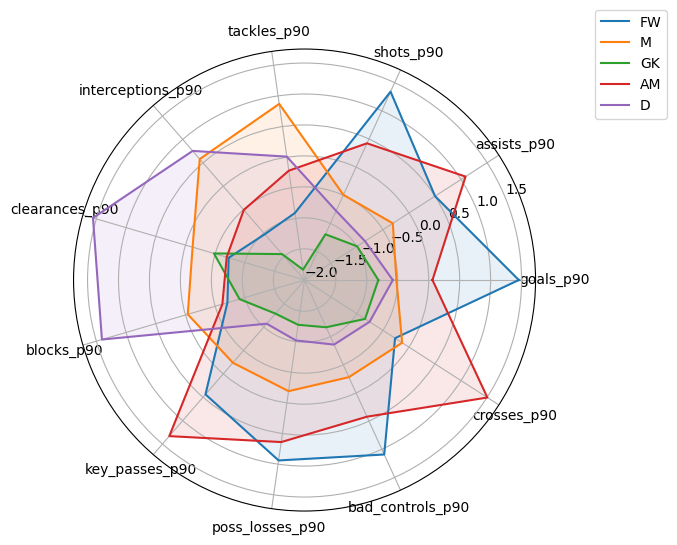

In [ ]:

def display_radar_chart():
  centers = pd.DataFrame(kmeans.cluster_centers_, columns=feature_names)
  centers.index = [cluster_names[i] for i in centers.index]

  num_features = len(feature_names)

  # Compute angles for radar
  angles = np.linspace(0, 2 * np.pi, num_features, endpoint=False).tolist()
  angles += angles[:1]  # Close the circle

  fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(polar=True))

  for i, row in centers.iterrows():
      values = row.tolist()
      values += values[:1]
      ax.plot(angles, values, label=f'{i}')
      ax.fill(angles, values, alpha=0.1)

  ax.set_xticks(angles[:-1])
  ax.set_xticklabels(feature_names)
  #ax.set_title('Cluster Feature Profiles')
  ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
  plt.show()

display_radar_chart()

## **Supervised Learning**:


Note:

*   **df_clean:**	The entire player dataset
*   **X_train:	95%** of df_clean used for K-Means clustering
*   **y = kmeans.labels_:**	The cluster assignments for each row in **X_train**
*   **df_test	The remaining:** 5% (unseen by K-Means)







In [ ]:
# Split data: 70% train, 15% validation, 15% test

X_train, X_temp, y_train, y_temp = train_test_split(X_scaled_all, y_all, test_size=0.3, random_state=42, stratify=y_all)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [ ]:
# Simple logistic regression model

lr = LogisticRegression(multi_class='multinomial', max_iter=200)

lr.fit(X_train, y_train)

y_pred_val = lr.predict(X_val)
print("Val Acc:", accuracy_score(y_val, y_pred_val))

# Test
y_pred_test = lr.predict(X_test)
print("Test Acc:", accuracy_score(y_test, y_pred_test))

Val Acc: 0.9926362297496318
Test Acc: 0.9852941176470589


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [ ]:
# XGBoost model

xgb = XGBClassifier(
    objective='multi:softprob',
    num_class=len(cluster_names),
    eval_metric='mlogloss',
    learning_rate=0.05,
    max_depth=5,
    n_estimators=300,
    random_state=42,
)
xgb.fit(X_train, y_train)
y_pred_val = xgb.predict(X_val)
print("XGB – Val",
      "Acc:", accuracy_score(y_val, y_pred_val),
      "BalAcc:", balanced_accuracy_score(y_val, y_pred_val),
      "MacroF1:", f1_score(y_val, y_pred_val, average='macro'))

print(classification_report(y_val, y_pred_val))

XGB – Val Acc: 0.9572901325478645 BalAcc: 0.9613087154639273 MacroF1: 0.9631732978769673
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       147
           1       0.94      0.97      0.96       227
           2       1.00      1.00      1.00        20
           3       0.94      0.88      0.91       133
           4       0.99      0.97      0.98       152

    accuracy                           0.96       679
   macro avg       0.97      0.96      0.96       679
weighted avg       0.96      0.96      0.96       679



In [ ]:
# Predicting on test set using XGBoost model

y_pred_test = xgb.predict(X_test)
print("XGB – Test",
      "Acc:", accuracy_score(y_test, y_pred_test),
      "BalAcc:", balanced_accuracy_score(y_test, y_pred_test),
      "MacroF1:", f1_score(y_test, y_pred_test, average='macro'))

XGB – Test Acc: 0.9558823529411765 BalAcc: 0.95199646237128 MacroF1: 0.957705790486593


In [ ]:
# Predicting positions for completely unseen players.
test_set = df_unseen[feature_names]
assert X.columns.equals(test_set.columns)

test_set = scaler.transform(test_set)
probs = xgb.predict_proba(test_set)


In [ ]:
# Creating a DataFrame for predicted probabilities for each cluster

cluster_label_list = [cluster_names[i] for i in range(len(cluster_names))]
prob_df = pd.DataFrame(data=probs, columns=cluster_label_list)


In [ ]:
# Creating a data frame for the prediction results

prob_df.index = df_unseen.index
df_results = pd.concat([df_unseen[['name', 'position']], prob_df], axis=1)
df_results = df_results.reset_index(drop=True)


In [ ]:
# Printing out predicted positions for the unseen players
def print_p_pos(limit):
  header_order = sorted(cluster_names.values())

  print(f"         Name              Actual pos   Pos recommendations ")
  for i, row in df_results.head(limit).iterrows():
      # position probabilities
      top2 = row[header_order].sort_values(ascending=False).head(2)

      top2_str = "  ".join([f"{pos:<3}{val:>3.1f}" for pos, val in top2.items()])

      print(f"{i:>3}  {row['name']:<25} {row['position']:<10} {top2_str}")

print_p_pos(20)

         Name              Actual pos   Pos recommendations 
  0  David Silva               FW         FW 0.7  AM 0.3
  1  Ricardo Carvalho          D          D  1.0  M  0.0
  2  Fernando Torres           FW         FW 1.0  M  0.0
  3  Edinson Cavani            FW         FW 1.0  M  0.0
  4  Xabi Alonso               M          M  1.0  AM 0.0
  5  Carlo Cudicini            GK         GK 1.0  M  0.0
  6  Martin Demichelis         D          D  1.0  M  0.0
  7  Declan Rice               DM         M  1.0  D  0.0
  8  Emil Forsberg             FW         AM 1.0  FW 0.0
  9  Renato Civelli            D          D  1.0  GK 0.0
 10  Luca Rigoni               M          M  1.0  GK 0.0
 11  Paolo Cannavaro           D          D  1.0  M  0.0
 12  Fabian Ruiz               M          M  1.0  FW 0.0
 13  Marc Bartra               DM         D  0.7  M  0.3
 14  Chris Brunt               M          AM 1.0  M  0.0
 15  Steed Malbranque          M          M  0.9  AM 0.1
 16  Benjamin Stambouli    

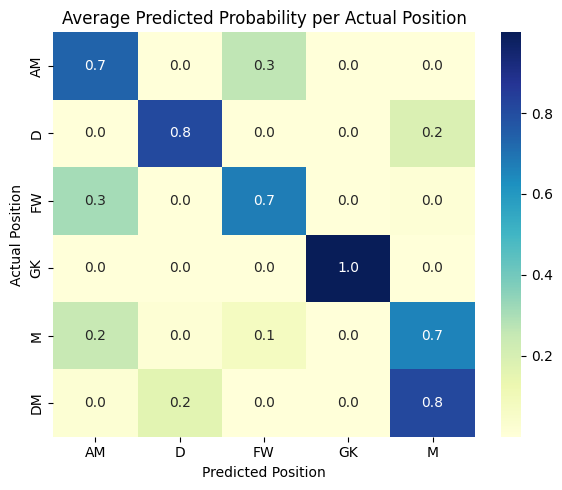

In [ ]:
# Heatmap

def print_heatmap():
  # Taking all actual positions
  actual_positions = sorted(df_results["position"].unique())

  # Moving "DM" to last
  if "DM" in actual_positions:
      actual_positions.remove("DM")
      actual_positions.append("DM")


  predicted_positions = sorted(cluster_names.values())


  # Computing average predicted probabilities for each actual position
  avg_probs = (
      df_results.groupby("position")[predicted_positions]
      .mean()
      .reindex(actual_positions)
  )

  # Ploting heatmap
  plt.figure(figsize=(6, 5))
  sns.heatmap(avg_probs, annot=True, fmt=".1f", cmap="YlGnBu",
              xticklabels=predicted_positions, yticklabels=actual_positions)
  plt.title("Average Predicted Probability per Actual Position")
  plt.xlabel("Predicted Position")
  plt.ylabel("Actual Position")
  plt.tight_layout()
  plt.show()


print_heatmap()